In [1]:
# Import the data from the drive
from google.colab import drive
drive.mount('/content/drive')
%cp -r "drive/MyDrive/plants-classifier" "plants-classifier/"

Mounted at /content/drive


In [2]:
# Copy the data from the drive to the local repository folder
%cp "drive/MyDrive/[2023-2024] AN2DL/Homework 1/public_data.zip" "plants-classifier/data/"
# Unzip the data
!unzip plants-classifier/data/public_data.zip -d plants-classifier/data/
# Remove the zip file
!rm plants-classifier/data/public_data.zip
%cd plants-classifier/

cp: cannot stat 'drive/MyDrive/[2023-2024] AN2DL/Homework 1/public_data.zip': No such file or directory
unzip:  cannot find or open plants-classifier/data/public_data.zip, plants-classifier/data/public_data.zip.zip or plants-classifier/data/public_data.zip.ZIP.
rm: cannot remove 'plants-classifier/data/public_data.zip': No such file or directory
/content/plants-classifier


In [3]:
# Custom modules
from imports import *
import utils

2.14.0


In [4]:
X_train_val_with_out, y_train_val_with_out, X_train_val, y_train_val, labels, X_out, y_out, shrek, trol = utils.data_processing()

The dataset without outliers contains 5004 images of plants, 3101 healthy and 1903 unhealthy.
The ratio of the healthy plants over the total is 0.62.
The ratio of the healthy plants over the total considering also outliers is 0.62.
Each image has shape (96, 96, 3).
The labels encoding is: {0: 'healthy', 1: 'unhealthy'}.


In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=SEED, test_size=0.2, stratify=y_train_val)

In [6]:
!pip install mxnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [7]:
# code to hide the patches of an image randomly
# input argument : path of the image

import mxnet as mx
import random
import matplotlib.pyplot as plt
import sys
def hide_patch(img):
    # get width and height of the image
    img_aug = np.copy(img)
    s = img_aug.shape
    wd = s[0]
    ht = s[1]

    # possible grid size, 0 means no hiding
    grid_sizes=[0,4,8,16,32]

    # hiding probability
    hide_prob = 0.3

    # randomly choose one grid size
    grid_size= grid_sizes[random.randint(0,len(grid_sizes)-1)]

    # hide the patches
    if(grid_size!=0):
         for x in range(0,wd,grid_size):
             for y in range(0,ht,grid_size):
                 x_end = min(wd, x+grid_size)
                 y_end = min(ht, y+grid_size)
                 if(random.random() <=  hide_prob):
                       img_aug[x:x_end,y:y_end,:]=0

    return img_aug

In [8]:
# img = X_train[random.randint(0,len(y_train)-1)]/255


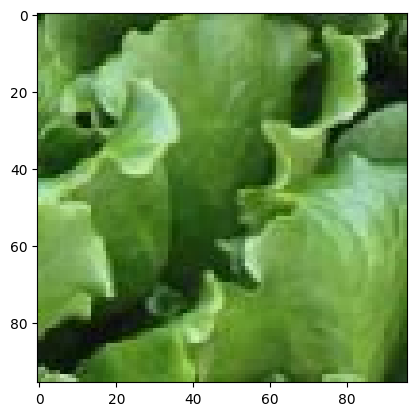

In [9]:
# plt.imshow(img)
# plt.show()

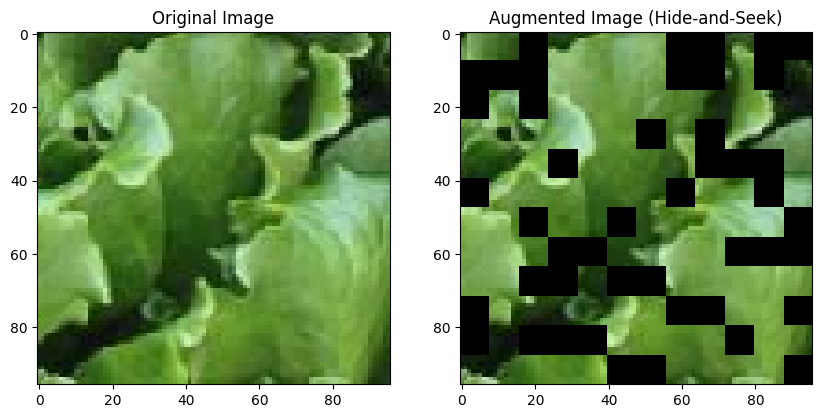

In [10]:
# path of the image
# im_path=sys.argv[1]

# read the input image
# img = X_train[random.randint(0,len(y_train)-1)]/255

#resize the image
# img = mx.image.imresize(img, 224, 224)

#subtract mean and divide standard deviation before calling hide_patch in actual training

img_aug = hide_patch(img)
#plt.imshow(img_aug)
#plt.show()

# Plot the original and augmented images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img)
axes[0].set_title('Original Image')

axes[1].imshow(img_aug)
axes[1].set_title('Augmented Image (Hide-and-Seek)')

plt.show()

In [12]:
# Create an array to store augmented images
X_train_aug = []

# Apply hide_patch transformation to each image in X_train
for img in X_train:
    img_aug = hide_patch(img)
    X_train_aug.append(img_aug)

# Convert the list of augmented images to a NumPy array
X_train_aug = np.array(X_train_aug)

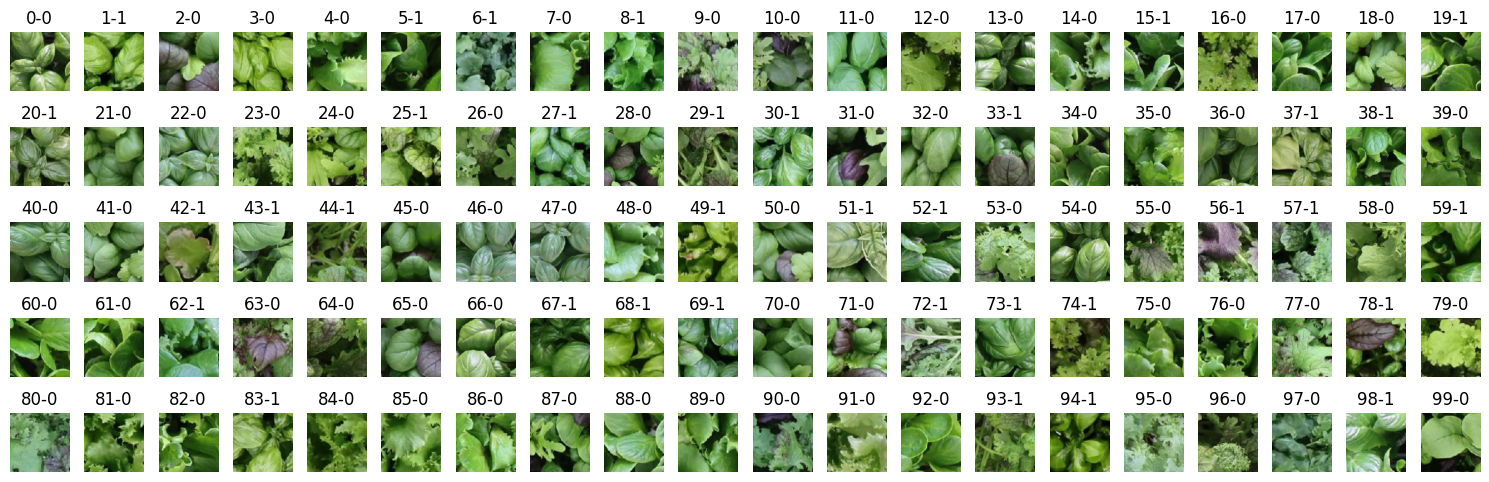

In [14]:
utils.plot_images(X_train,y_train)

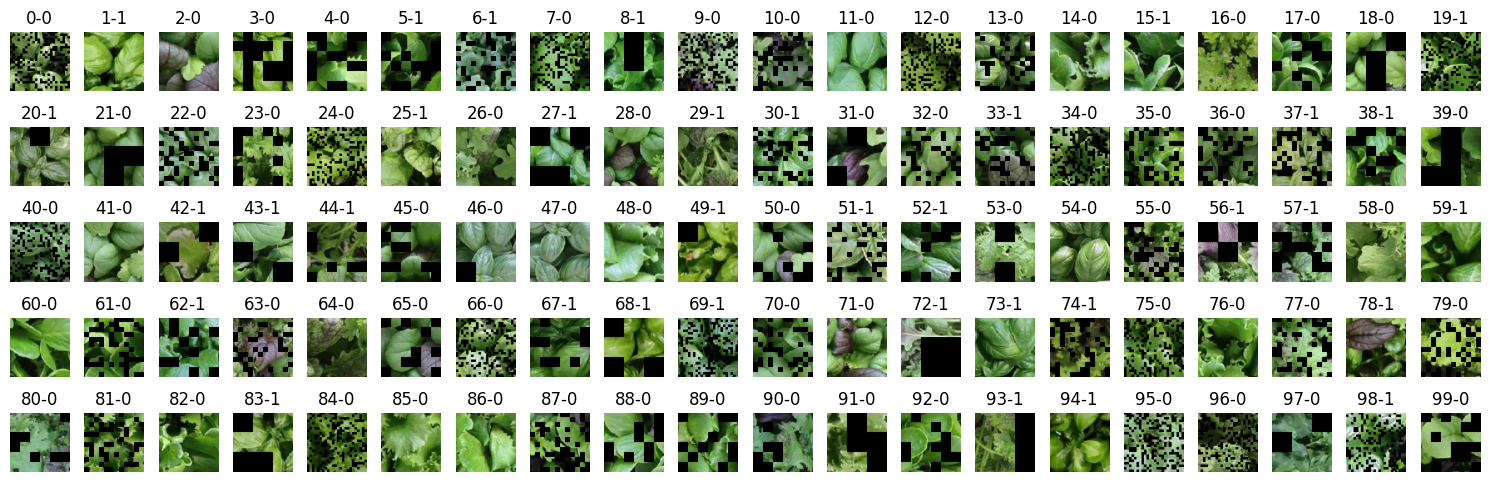

In [15]:
utils.plot_images(X_train_aug,y_train)

### PROVE (DA NON COSIDERARE)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset or use any sample dataset
# (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Define a function for hide-and-seek augmentation
def hide_and_seek_augmentation(image):
    # Copy the input image to avoid modifying the original
    augmented_image = np.copy(image)

    # Randomly determine the area to hide
    mask = np.random.rand(*image.shape[:2]) < 0.5

    # Set the pixels in the chosen area to zero (black)
    augmented_image[mask, :] = 0

    return augmented_image


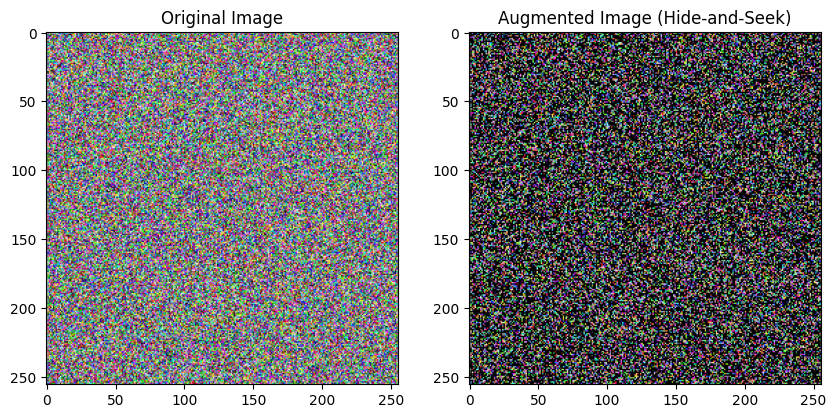

In [ ]:
# Example usage with a dummy image
image = np.random.rand(256, 256, 3)  # Replace this with your actual image

# Apply hide-and-seek augmentation
augmented_image = hide_and_seek_augmentation(image)

# Plot the original and augmented images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')

axes[1].imshow(augmented_image)
axes[1].set_title('Augmented Image (Hide-and-Seek)')

plt.show()